In [1]:
import json
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

%matplotlib inline

In [69]:
data_d2v = json.load(open('../data/ia_doc2vec_clustering.json'))
data_n2v = json.load(open('../data/15_non_ia_node2vec_clustering_1.0_1.0.json'))
print(data_d2v.keys())
print(data_n2v.keys())

dict_keys(['n_clusters', 'true_labels', 'node_ids', 'kmeans_labels', 'hierarchical_labels'])
dict_keys(['hierarchical_labels', 'n_clusters', 'node_ids', 'kmeans_labels', 'true_labels'])


In [70]:
all_k = set(data_d2v.keys()).intersection(set(data_n2v.keys()))
data_d2v = {k : v for k,v in data_d2v.items() if k in all_k}
data_n2v = {k : v for k,v in data_n2v.items() if k in all_k}
assert len(data_d2v.keys())==len(data_n2v.keys())

In [71]:
from sklearn import metrics
from gensim import models

In [72]:
from doc2vec.doc2vec import doc2vec
from node2vec.node2vec import node2vec
from utilities import score_purity
from utilities import score_agreement

In [73]:
d2v_model = doc2vec(model=models.Doc2Vec.load("../data/scotus/scotus_model.doc2vec"),label_docs=False)
n2v_model = node2vec(model=models.Word2Vec.load("../data/scotus_n2v_1.0_1.0_mini.node2vec"))

In [74]:
d2v_embeddings = d2v_model.model.docvecs
n2v_embeddings = n2v_model.model.wv

In [75]:
node_order = {}
node_ids = []
true_labels = []
kmeans_d2v = []
hierarchical_d2v = []
kmeans_n2v = []
hierarchical_n2v = []

for i in range(len(data_d2v['node_ids'])):
    node_order[i] = data_d2v['node_ids'][i]
    node_ids.append(data_d2v['node_ids'][i])

# for i in range(len(data_n2v[5]['node_ids'])):
#     node_order_n2v[i] = data_n2v[5]['node_ids'][i]
#     node_ids_n2v.append(data_n2v[5]['node_ids'][i])
    
# X_d2v = [d2v_embeddings[tag].tolist() for tag in node_ids]
# X_n2v = [n2v_embeddings[tag].tolist() for tag in node_ids]

for n_id in node_ids:
    true_labels.append(data_d2v['true_labels'][data_d2v['node_ids'].index(n_id)])
    kmeans_d2v.append(data_d2v['kmeans_labels'][data_d2v['node_ids'].index(n_id)])
    hierarchical_d2v.append(data_d2v['hierarchical_labels'][data_d2v['node_ids'].index(n_id)])
    kmeans_n2v.append(data_n2v['kmeans_labels'][data_n2v['node_ids'].index(n_id)])
    hierarchical_n2v.append(data_n2v['hierarchical_labels'][data_n2v['node_ids'].index(n_id)])
        
print('complete')

complete


In [77]:
# scores = {}

# scores['accuracy_hierarchical'] = metrics.accuracy_score(data['true_labels'], data['hierarchical_labels'])
# scores['accuracy_kmeans'] = metrics.accuracy_score(data['true_labels'], data['kmeans_labels'])

# scores['nmi_hierarchical'] = metrics.normalized_mutual_info_score(data['true_labels'], data['hierarchical_labels'])
# scores['nmi_kmeans'] = metrics.normalized_mutual_info_score(data['true_labels'], data['kmeans_labels'])

# scores['purity_hierarchical'] = score_purity(data['true_labels'], data['hierarchical_labels'])
# scores['purity_kmeans'] = score_purity(data['true_labels'], data['kmeans_labels'])

# scores['sil_hierarchical'] = metrics.silhouette_score(X, k_to_hierarchical)
# scores['sil_kmeans'] = metrics.silhouette_score(X, k_to_kmeans)

#scores['agreement'][k] = score_agreement(v['kmeans_labels'], v['hierarchical_labels'])

scores = {
    'vmeasure_kmeans_d2v' : None,
    'vmeasure_hierarchical_d2v' : None,
    'vmeasure_kmeans_n2v' : None,
    'vmeasure_hierarchical_n2v' : None,
    'hom_kmeans_d2v' : None,
    'hom_hierarchical_d2v' : None,
    'hom_kmeans_n2v' : None,
    'hom_hierarchical_n2v' : None,
    'nmi_kmeans_d2v' : None,
    'nmi_hierarchical_d2v' : None,
    'nmi_kmeans_n2v' : None,
    'nmi_hierarchical_n2v' : None,
    'complete_kmeans_d2v' : None,
    'complete_hierarchical_d2v' : None,
    'complete_kmeans_n2v' : None,
    'complete_hierarchical_n2v' : None,
    'mean_kmeans_d2v' : None,
    'mean_hierarchical_d2v' : None,
    'mean_kmeans_n2v' : None,
    'mean_hierarchical_n2v' : None
    #'agreement' : {},
#     'sil_hierarchical' : {},
#     'sil_kmeans' : {}
         }

scores['vmeasure_kmeans_d2v'] = metrics.v_measure_score(kmeans_d2v, true_labels)
scores['vmeasure_hierarchical_d2v'] = metrics.v_measure_score(hierarchical_d2v, true_labels)
scores['vmeasure_kmeans_n2v'] = metrics.v_measure_score(kmeans_n2v, true_labels)
scores['vmeasure_hierarchical_n2v'] = metrics.v_measure_score(hierarchical_n2v, true_labels)

scores['hom_kmeans_d2v'] = metrics.homogeneity_score(kmeans_d2v, true_labels)
scores['hom_hierarchical_d2v'] = metrics.homogeneity_score(hierarchical_d2v, true_labels)
scores['hom_kmeans_n2v'] = metrics.homogeneity_score(kmeans_n2v, true_labels)
scores['hom_hierarchical_n2v'] = metrics.homogeneity_score(hierarchical_n2v, true_labels)

scores['nmi_kmeans_d2v'] = metrics.normalized_mutual_info_score(kmeans_d2v, true_labels)
scores['nmi_hierarchical_d2v'] = metrics.normalized_mutual_info_score(hierarchical_d2v, true_labels)
scores['nmi_kmeans_n2v'] = metrics.normalized_mutual_info_score(kmeans_n2v, true_labels)
scores['nmi_hierarchical_n2v'] = metrics.normalized_mutual_info_score(hierarchical_n2v, true_labels)

scores['complete_kmeans_d2v'] = metrics.completeness_score(kmeans_d2v, true_labels)
scores['complete_hierarchical_d2v'] = metrics.completeness_score(hierarchical_d2v, true_labels)
scores['complete_kmeans_n2v'] = metrics.completeness_score(kmeans_n2v, true_labels)
scores['complete_hierarchical_n2v'] = metrics.completeness_score(hierarchical_n2v, true_labels)

scores['mean_kmeans_d2v'] = sum([scores['vmeasure_kmeans_d2v'],
                                scores['hom_kmeans_d2v'],
                                scores['nmi_kmeans_d2v'],
                                scores['complete_kmeans_d2v']
                               ])/4
scores['mean_hierarchical_d2v'] = sum([scores['vmeasure_hierarchical_d2v'],
                                scores['hom_hierarchical_d2v'],
                                scores['nmi_hierarchical_d2v'],
                                scores['complete_hierarchical_d2v']
                               ])/4
scores['mean_kmeans_n2v'] = sum([scores['vmeasure_kmeans_n2v'],
                                scores['hom_kmeans_n2v'],
                                scores['nmi_kmeans_n2v'],
                                scores['complete_kmeans_n2v']
                               ])/4
scores['mean_hierarchical_n2v'] = sum([scores['vmeasure_hierarchical_n2v'],
                                scores['hom_hierarchical_n2v'],
                                scores['nmi_hierarchical_n2v'],
                                scores['complete_hierarchical_n2v']
                               ])/4

print(scores)

{'vmeasure_kmeans_d2v': 0.15521444309839044, 'vmeasure_hierarchical_d2v': 0.20361511843801927, 'vmeasure_kmeans_n2v': 0.18625016423401558, 'vmeasure_hierarchical_n2v': 0.012132035799842516, 'hom_kmeans_d2v': 0.14104769672501044, 'hom_hierarchical_d2v': 0.21798415509817856, 'hom_kmeans_n2v': 0.17274794858931125, 'hom_hierarchical_n2v': 0.032343521331921588, 'nmi_kmeans_d2v': 0.1560033242195204, 'nmi_hierarchical_d2v': 0.20405893511016829, 'nmi_kmeans_n2v': 0.18682170398079684, 'nmi_hierarchical_n2v': 0.015539859719576974, 'complete_kmeans_d2v': 0.17254473297064041, 'complete_hierarchical_d2v': 0.19102328322690007, 'complete_kmeans_n2v': 0.20204204659625152, 'complete_hierarchical_n2v': 0.0074663249442105126, 'mean_kmeans_d2v': 0.15620254925339042, 'mean_hierarchical_d2v': 0.20417037296831655, 'mean_kmeans_n2v': 0.18696546585009383, 'mean_hierarchical_n2v': 0.016870435448887899}


In [78]:
sort_scores = [(k, scores[k]) for k in sorted(scores, key=scores.get, reverse=True)]

for s in sort_scores:
    print(s[0],'-'*(30-len(s[0])),s[1])

hom_hierarchical_d2v ---------- 0.217984155098
mean_hierarchical_d2v --------- 0.204170372968
nmi_hierarchical_d2v ---------- 0.20405893511
vmeasure_hierarchical_d2v ----- 0.203615118438
complete_kmeans_n2v ----------- 0.202042046596
complete_hierarchical_d2v ----- 0.191023283227
mean_kmeans_n2v --------------- 0.18696546585
nmi_kmeans_n2v ---------------- 0.186821703981
vmeasure_kmeans_n2v ----------- 0.186250164234
hom_kmeans_n2v ---------------- 0.172747948589
complete_kmeans_d2v ----------- 0.172544732971
mean_kmeans_d2v --------------- 0.156202549253
nmi_kmeans_d2v ---------------- 0.15600332422
vmeasure_kmeans_d2v ----------- 0.155214443098
hom_kmeans_d2v ---------------- 0.141047696725
hom_hierarchical_n2v ---------- 0.0323435213319
mean_hierarchical_n2v --------- 0.0168704354489
nmi_hierarchical_n2v ---------- 0.0155398597196
vmeasure_hierarchical_n2v ----- 0.0121320357998
complete_hierarchical_n2v ----- 0.00746632494421


In [79]:
plt.style.use('fivethirtyeight')

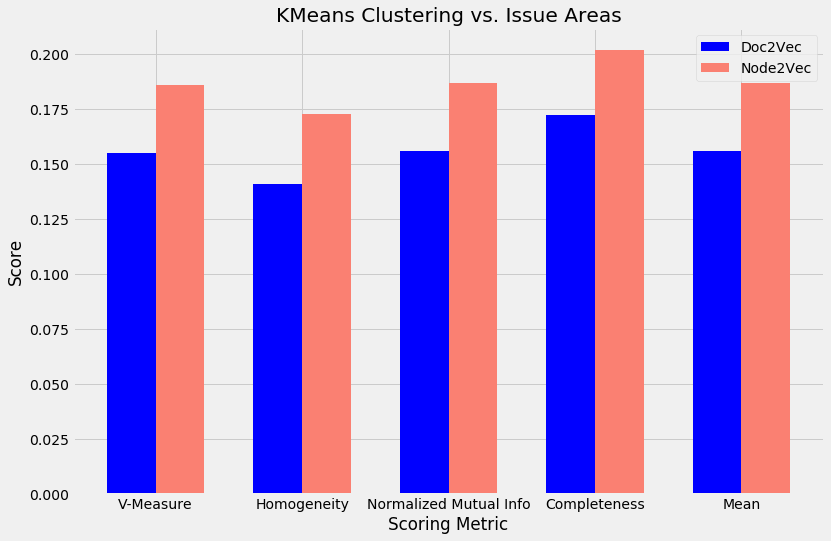

In [80]:
fig, ax = plt.subplots(figsize=(12,8))
ax.set_title('KMeans Clustering vs. Issue Areas')
ax.set_xlabel('Scoring Metric')
ax.set_ylabel('Score')
ax.set_xticks([0.125, 0.875, 1.625, 2.375, 3.125])
ax.set_xticklabels(('V-Measure', 'Homogeneity', 'Normalized Mutual Info', 'Completeness', 'Mean'))
ax.bar(0, scores['vmeasure_kmeans_d2v'], width=0.25, color='b', label="Doc2Vec")
ax.bar(0.25, scores['vmeasure_kmeans_n2v'], width=0.25, color='salmon', label="Node2Vec")
ax.bar(0.75, scores['hom_kmeans_d2v'], width=0.25, color='b')
ax.bar(1, scores['hom_kmeans_n2v'], width=0.25, color='salmon')
ax.bar(1.5, scores['nmi_kmeans_d2v'], width=0.25, color='b')
ax.bar(1.75, scores['nmi_kmeans_n2v'], width=0.25, color='salmon')
ax.bar(2.25, scores['complete_kmeans_d2v'], width=0.25, color='b')
ax.bar(2.5, scores['complete_kmeans_n2v'], width=0.25, color='salmon')
ax.bar(3.0, scores['mean_kmeans_d2v'], width=0.25, color='b')
ax.bar(3.25, scores['mean_kmeans_n2v'], width=0.25, color='salmon')
ax.legend(loc='best')
fig.savefig('../plots/ia_kmeans_d2v_n2v_first.png')

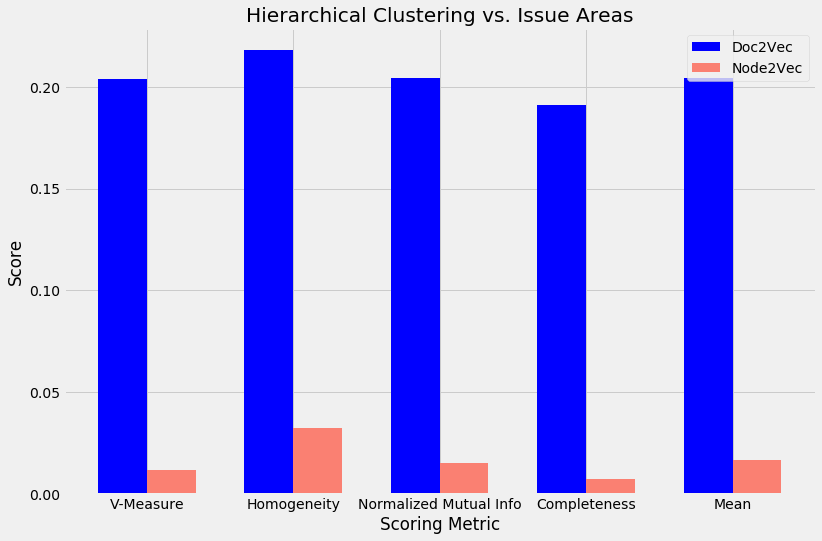

In [82]:
fig, ax = plt.subplots(figsize=(12,8))
ax.set_title('Hierarchical Clustering vs. Issue Areas')
ax.set_xlabel('Scoring Metric')
ax.set_ylabel('Score')
ax.set_xticks([0.125, 0.875, 1.625, 2.375, 3.125])
ax.set_xticklabels(('V-Measure', 'Homogeneity', 'Normalized Mutual Info', 'Completeness', 'Mean'))
ax.bar(0, scores['vmeasure_hierarchical_d2v'], width=0.25, color='b', label="Doc2Vec")
ax.bar(0.25, scores['vmeasure_hierarchical_n2v'], width=0.25, color='salmon', label="Node2Vec")
ax.bar(0.75, scores['hom_hierarchical_d2v'], width=0.25, color='b')
ax.bar(1, scores['hom_hierarchical_n2v'], width=0.25, color='salmon')
ax.bar(1.5, scores['nmi_hierarchical_d2v'], width=0.25, color='b')
ax.bar(1.75, scores['nmi_hierarchical_n2v'], width=0.25, color='salmon')
ax.bar(2.25, scores['complete_hierarchical_d2v'], width=0.25, color='b')
ax.bar(2.5, scores['complete_hierarchical_n2v'], width=0.25, color='salmon')
ax.bar(3.0, scores['mean_hierarchical_d2v'], width=0.25, color='b')
ax.bar(3.25, scores['mean_hierarchical_n2v'], width=0.25, color='salmon')
ax.legend(loc='best')
fig.savefig('../plots/ia_hierarchical_d2v_n2v_first.png')